In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [28]:
X,Y = make_blobs(500,2,centers=5,cluster_std=0.6)

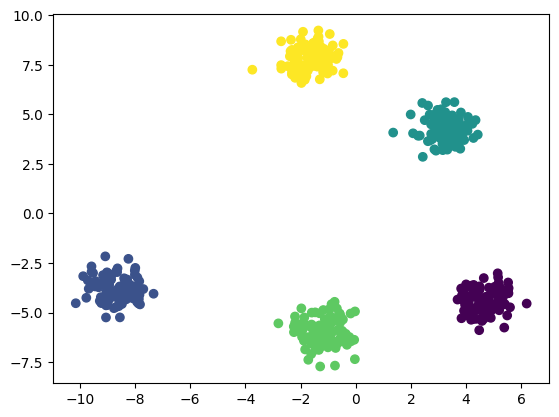

In [29]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [13]:
def intializeClusters(k,n_features=2,max = 10,min = -10):
    clusters = []
    for i in range(k):
        cluster = {}
        cluster['Center'] = (max-min)*np.random.random((n_features,))+min
        cluster['Points'] = []
        clusters.append(cluster)
    return clusters

In [14]:
intializeClusters(4)

[{'Center': array([-5.18759895,  2.46959907]), 'Points': []},
 {'Center': array([9.80367728, 0.31181099]), 'Points': []},
 {'Center': array([8.47484842, 5.06341778]), 'Points': []},
 {'Center': array([-1.83811118, -0.9434129 ]), 'Points': []}]

In [15]:
def distance(v1,v2):
    return np.sqrt(np.sum((v2-v1)**2))

In [26]:
def assignPoints(X,clusters):
    for i in range(X.shape[0]):
        curX = X[i]
        dist = []
        for nc in range(len(clusters)):
            dist.append(distance(clusters[nc]['Center'],curX))
        nc = np.argmin(dist)
        clusters[nc]['Points'].append(curX)

def updateClusters(clusters):
    for nc in range(len(clusters)):
        if len(clusters[nc]['Points']) > 0:
            clusters[nc]['Center'] = np.mean(clusters[nc]['Points'],axis=0)
            clusters[nc]['Points'] = []

def plotClusters(clusters):
    for nc in range(len(clusters)):
        pts = np.array(clusters[nc]['Points'])
        try:
            plt.scatter(pts[:,0],pts[:,1])
        except:
            pass
        cen = clusters[nc]['Center']
        plt.scatter(cen[0],cen[1],c='black')
    
    plt.show()

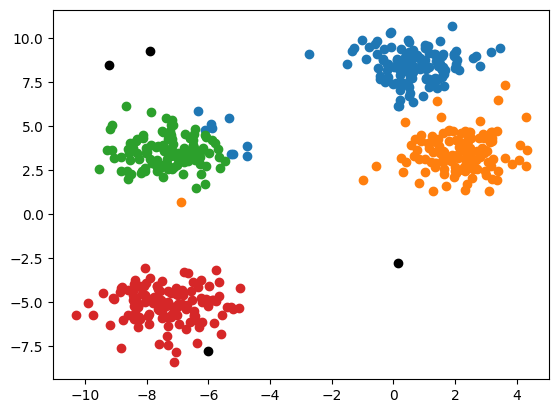

In [20]:
clusters = intializeClusters(4)
assignPoints(X,clusters)
updateClusters(clusters)
assignPoints(X,clusters)
plotClusters(clusters)

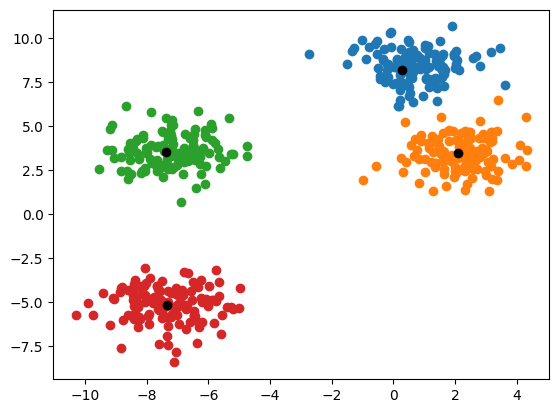

In [25]:
updateClusters(clusters)
assignPoints(X,clusters)
plotClusters(clusters)

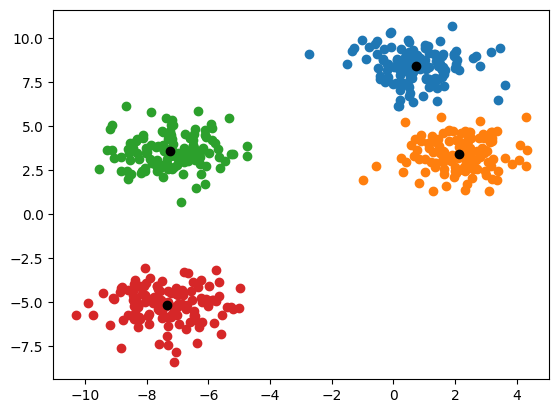

In [29]:
k = 4
clusters = intializeClusters(k)
for i in range(10):
    assignPoints(X,clusters)
    updateClusters(clusters)
assignPoints(X,clusters)
plotClusters(clusters)

In [30]:
from sklearn.cluster import KMeans

In [31]:
clf = KMeans(n_clusters=5)
clf.fit(X)

KMeans(n_clusters=5)

In [32]:
clf.cluster_centers_

array([[-8.70830267, -3.81502122],
       [ 3.25494456,  4.25151541],
       [-1.16009239, -5.93416273],
       [-1.63242962,  7.84906805],
       [ 4.68030458, -4.4103392 ]])

In [33]:
clf.inertia_

328.72829633882805

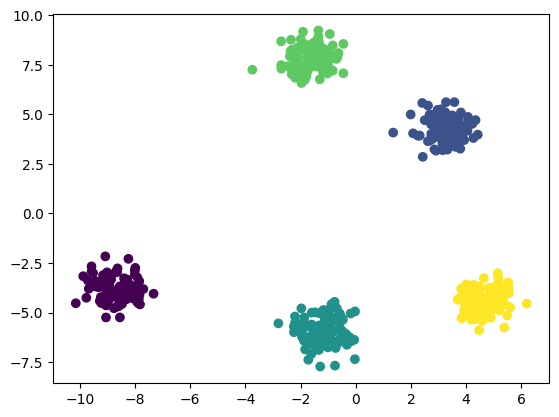

In [35]:
plt.scatter(X[:,0],X[:,1],c=clf.labels_)
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(X,clf.predict(X))

0.8384345169476957

In [43]:
k = [i for i in range(2,11)]
sse = []
sil = []
for i in k:
    clf = KMeans(n_clusters=i)
    clf.fit(X)
    sse.append(clf.inertia_)
    sil.append(silhouette_score(X,clf.labels_))

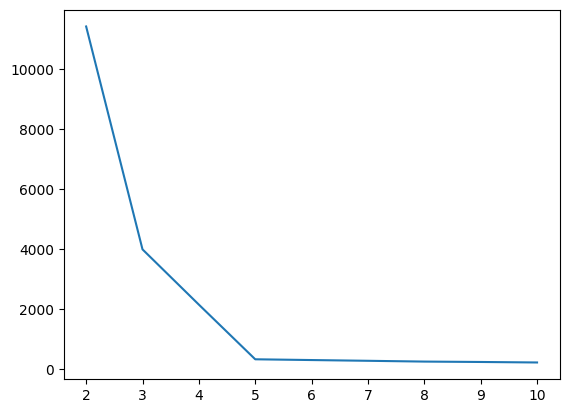

In [44]:
plt.plot(k,sse)
plt.show()

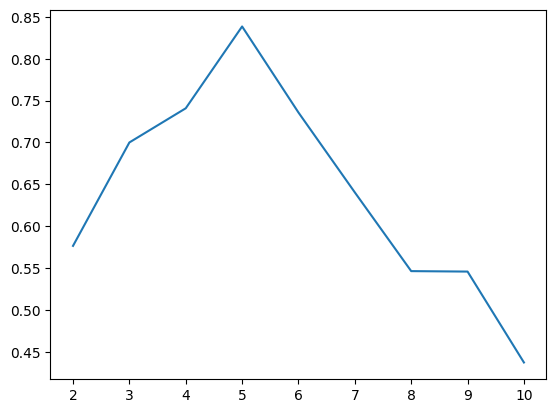

In [45]:
plt.plot(k,sil)
plt.show()